In [ ]:
!nvidia-smi

Fri Apr  5 18:23:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="kJsZ7pUWoS4c5t00BIBF")
project = rf.workspace("dan-riigq").project("traffic-count-vhsan")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Count-9 in yolov8:: 100%|██████████| 8570/8570 [00:01<00:00, 4465.38it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 217MB/s]
New https://pypi.org/project/ultralytics/8.1.43 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Traffic-Count-9/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line

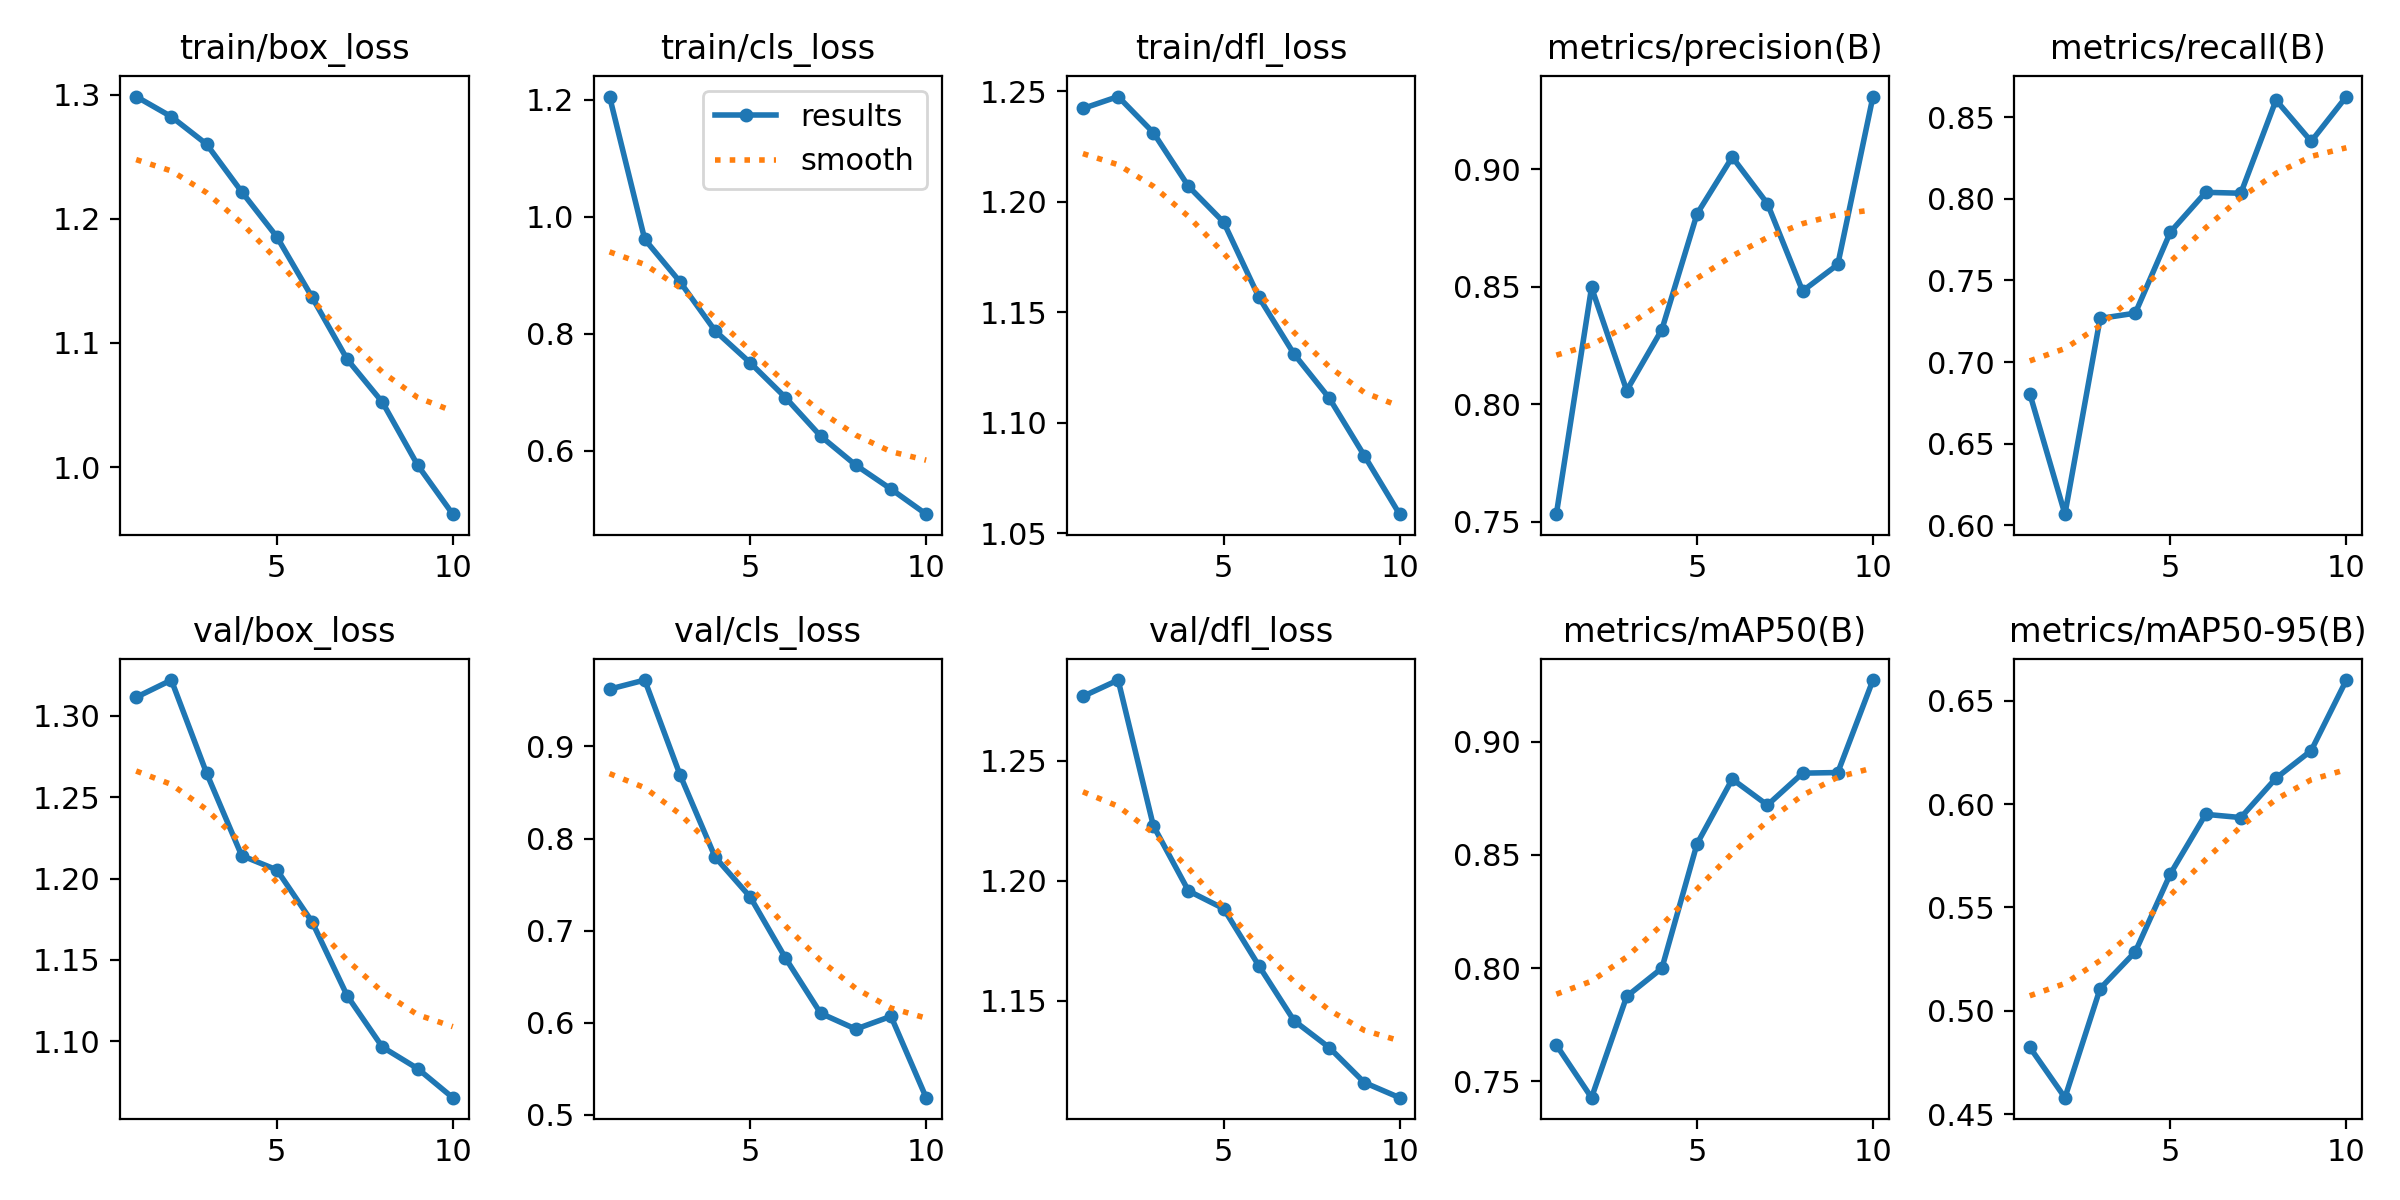

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt conf=0.5 data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/Traffic-Count-9/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/179 /content/Traffic-Count-9/test/images/20240226_070312_mp4-0001_jpg.rf.6d7c2b3df0410ee03aa87a6673365f5f.jpg: 640x640 6 Cars, 37.1ms
image 2/179 /content/Traffic-Count-9/test/images/20240226_070312_mp4-0002_jpg.rf.e063d8c96bdfbe527e47574ef9abb282.jpg: 640x640 5 Cars, 37.2ms
image 3/179 /content/Traffic-Count-9/test/images/20240226_070312_mp4-0005_jpg.rf.cdbf6b8b97ff481428005bb58979db0a.jpg: 640x640 5 Cars, 37.1ms
image 4/179 /content/Traffic-Count-9/test/images/20240226_070312_mp4-0006_jpg.rf.92bc3b9f91046c0452f9f02bb2a089b5.jpg: 640x640 5 Cars, 37.2ms
image 5/179 /content/Traffic-Count-9/test/images/20240226_070312_mp4-0007_jpg.rf.d5eb8850bb5d79e174476a0499b07b64.jpg: 640x640 5 Cars, 37.1ms
image 6/179 /content/Traffic-Count-9/test/images/20240226_070312_mp4-0008_jpg.

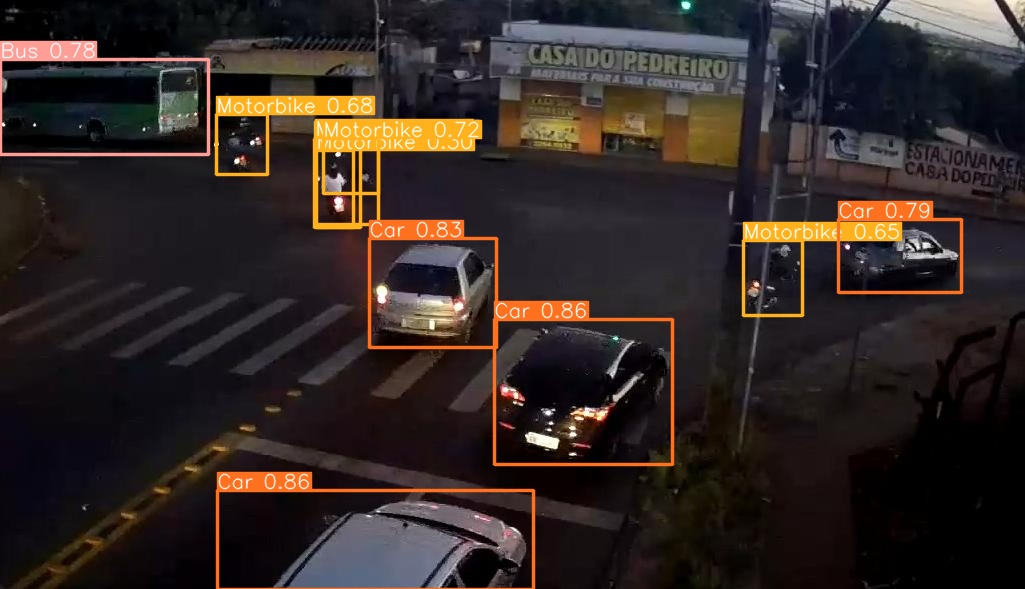

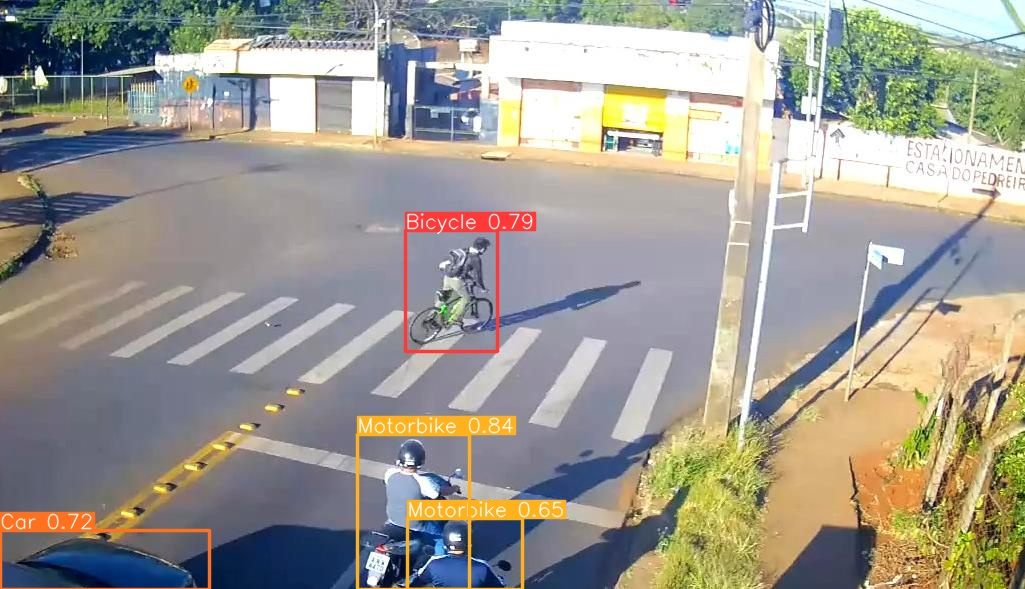

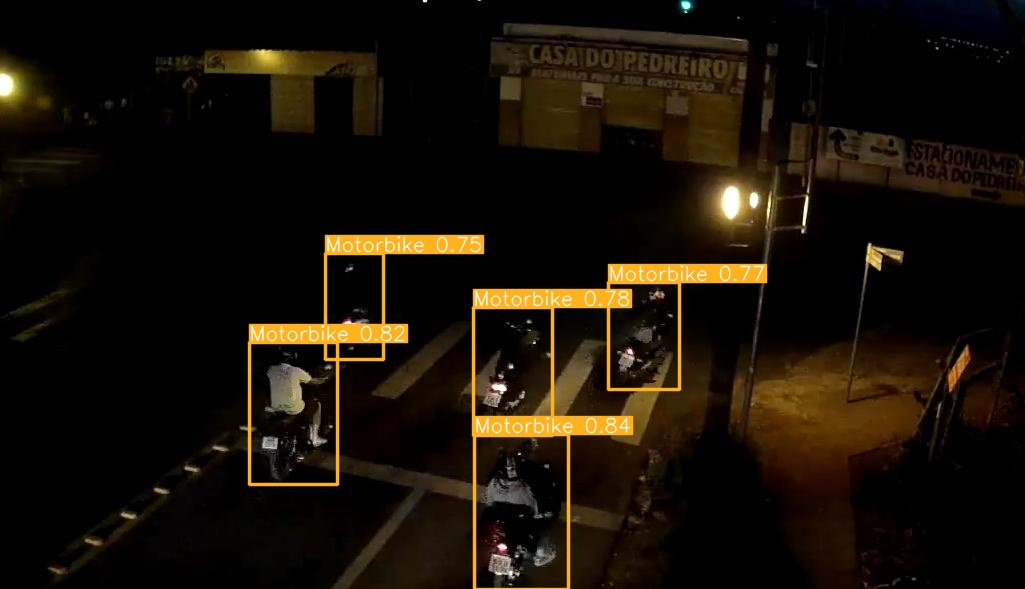

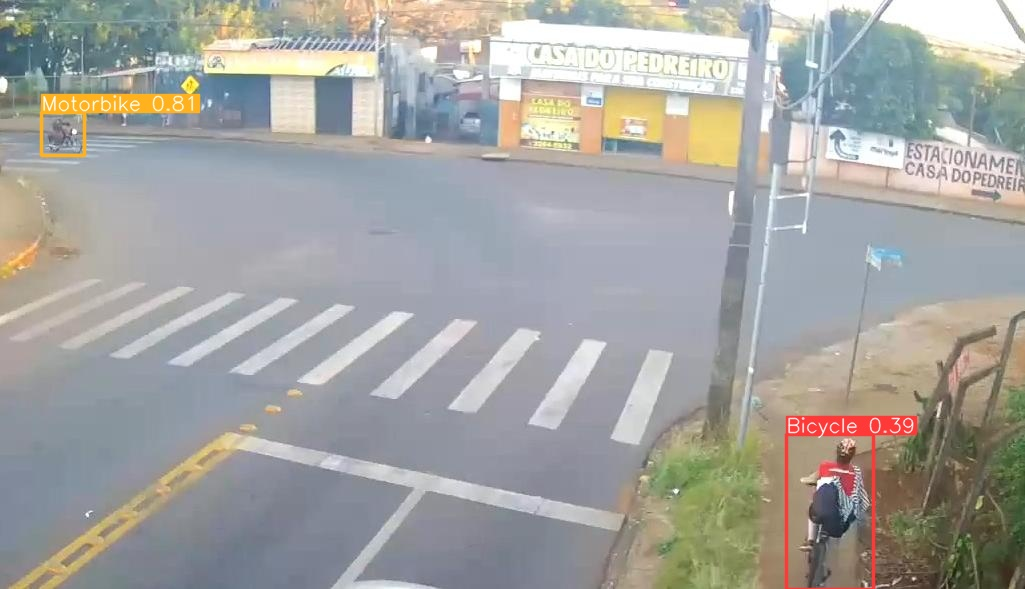

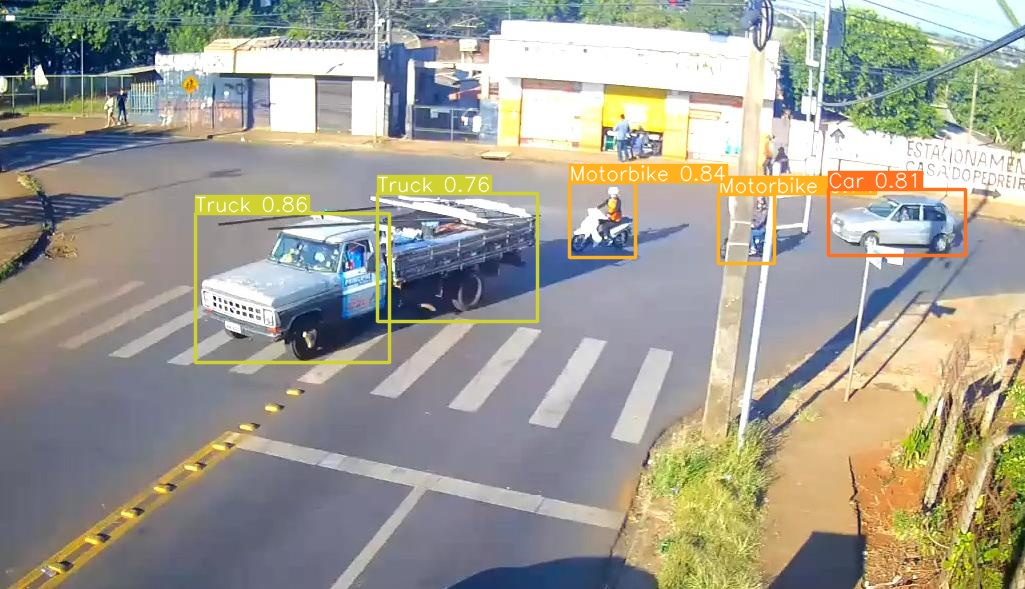

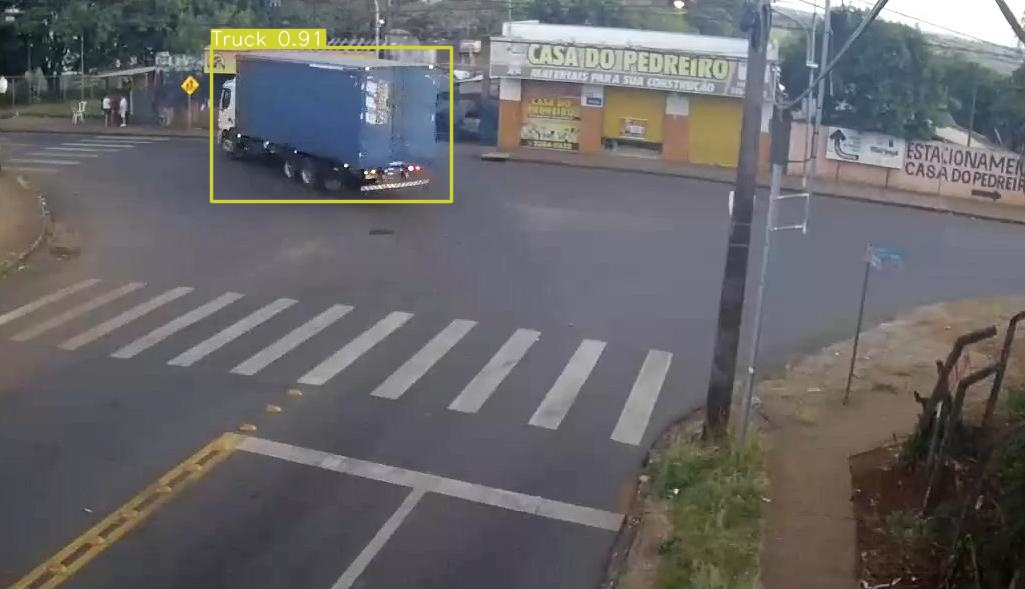

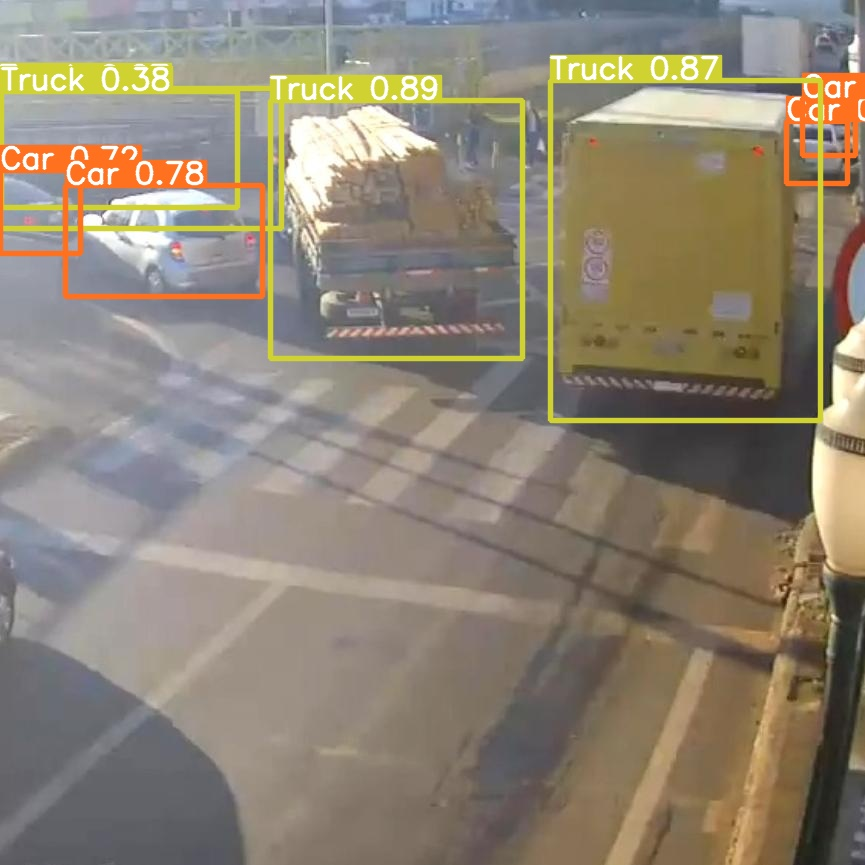

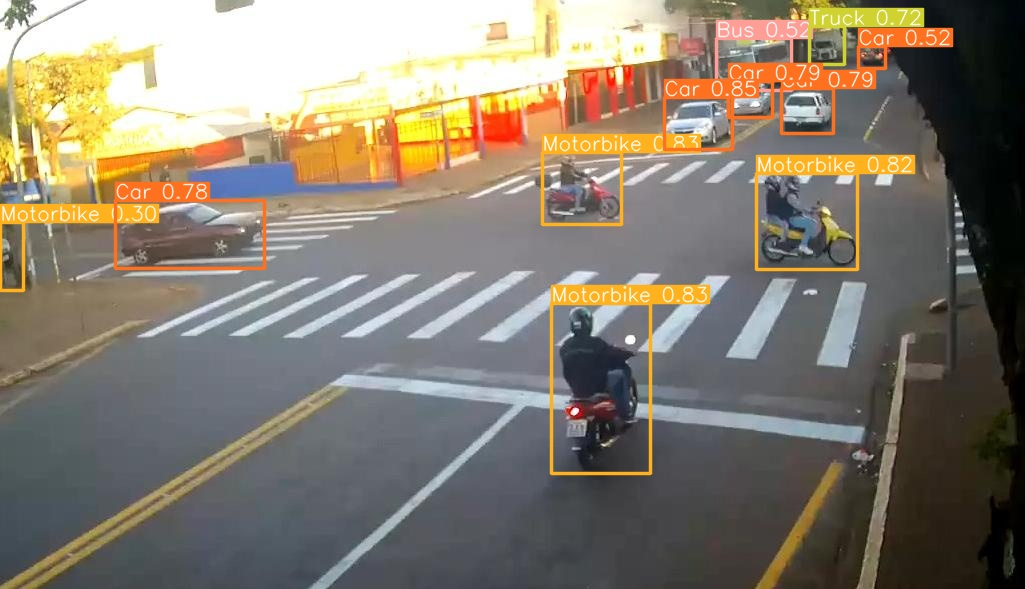

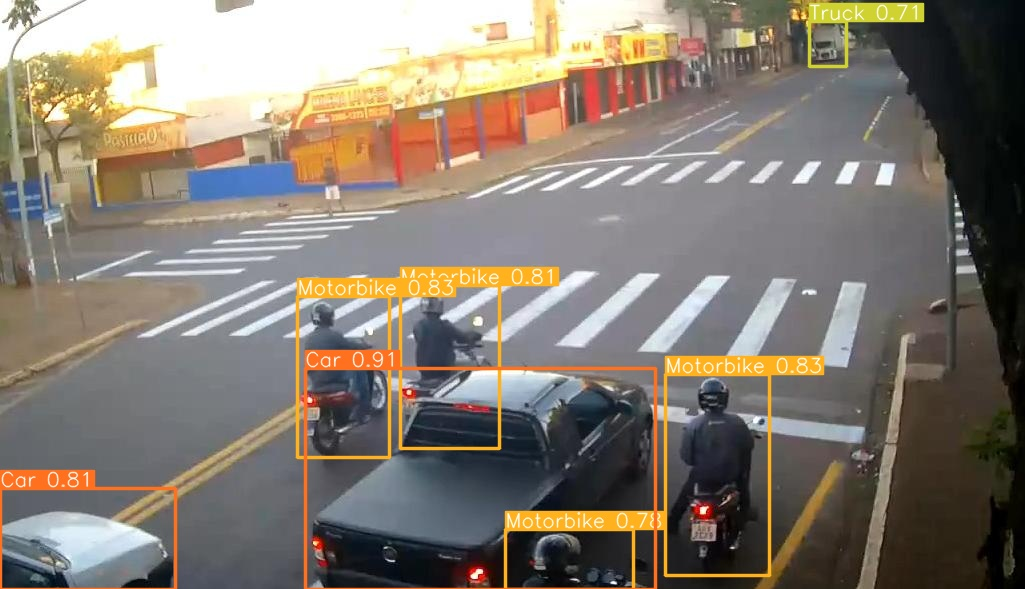

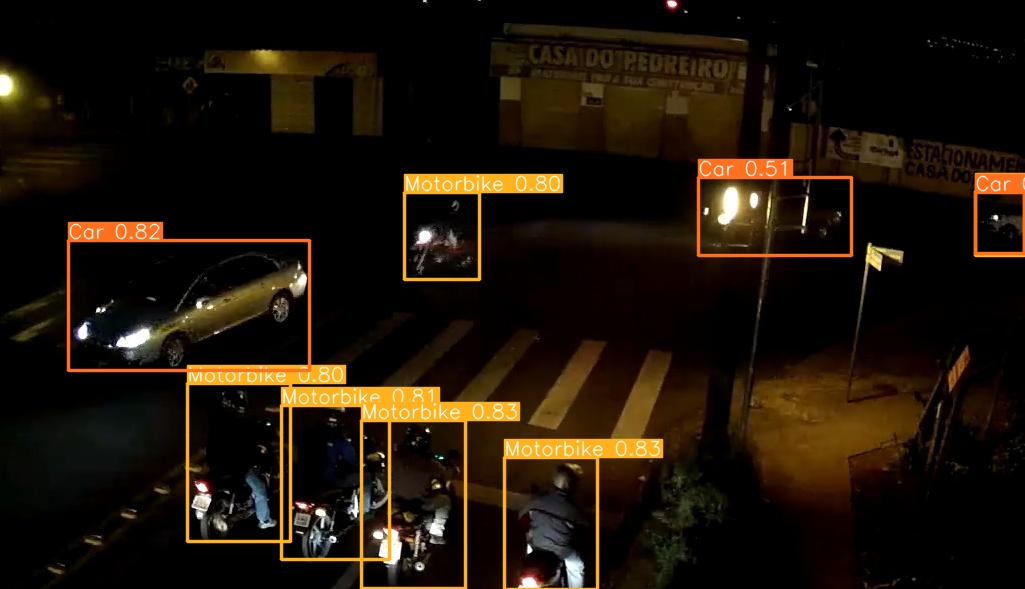

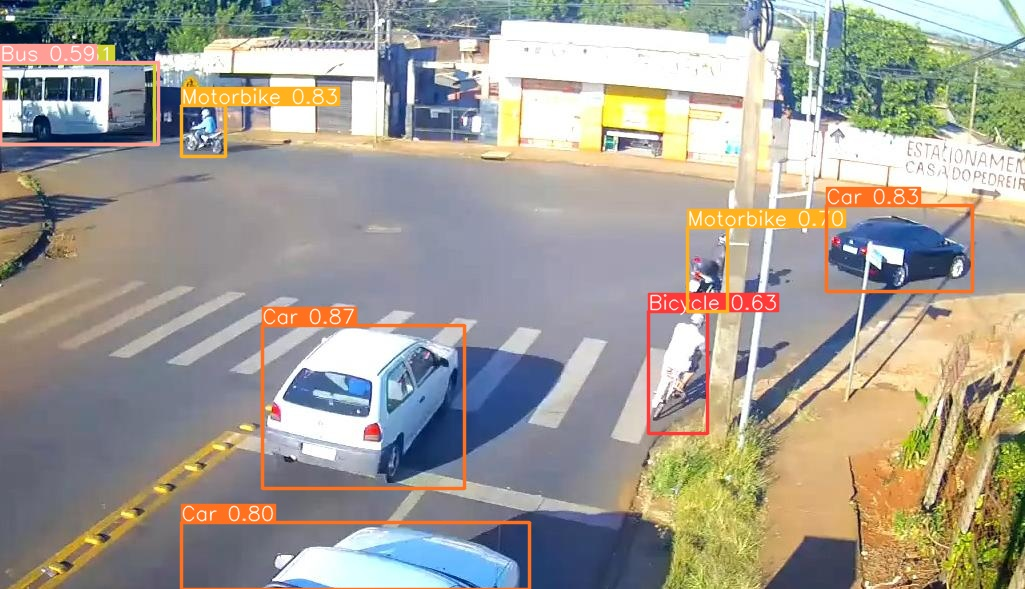

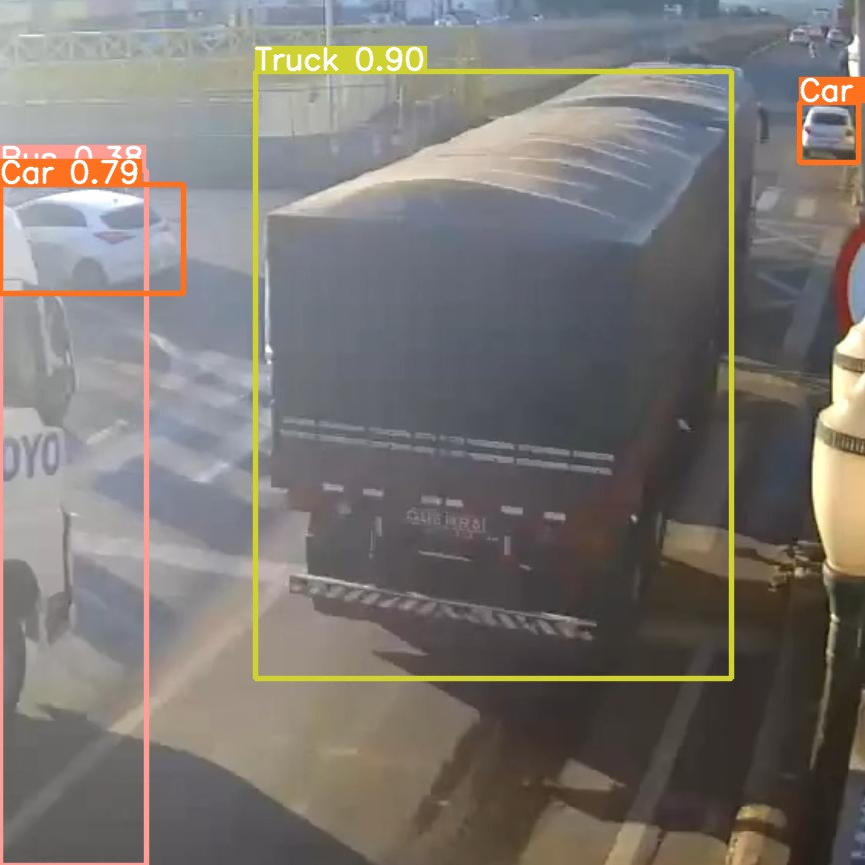

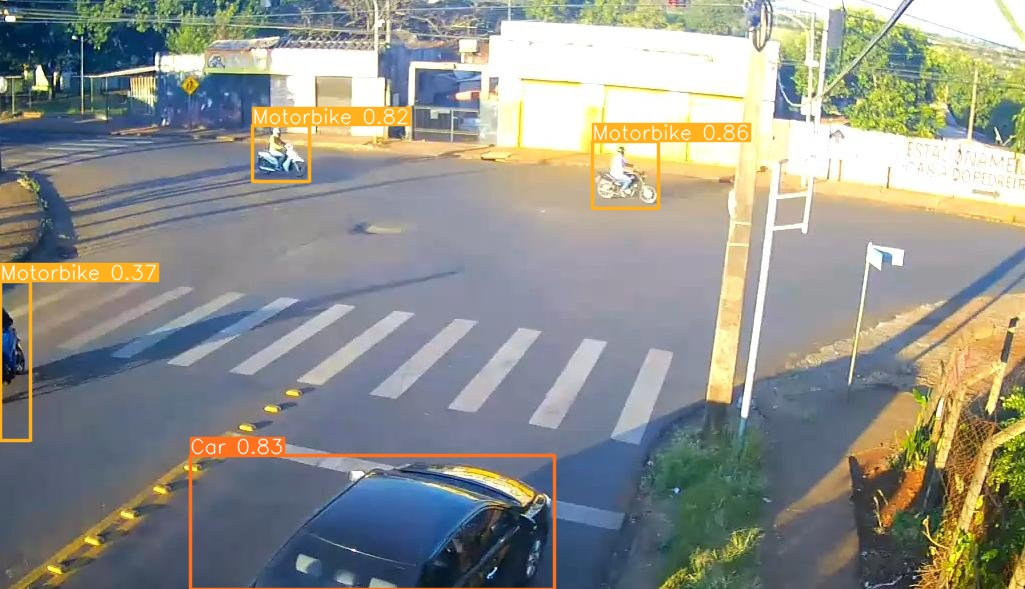

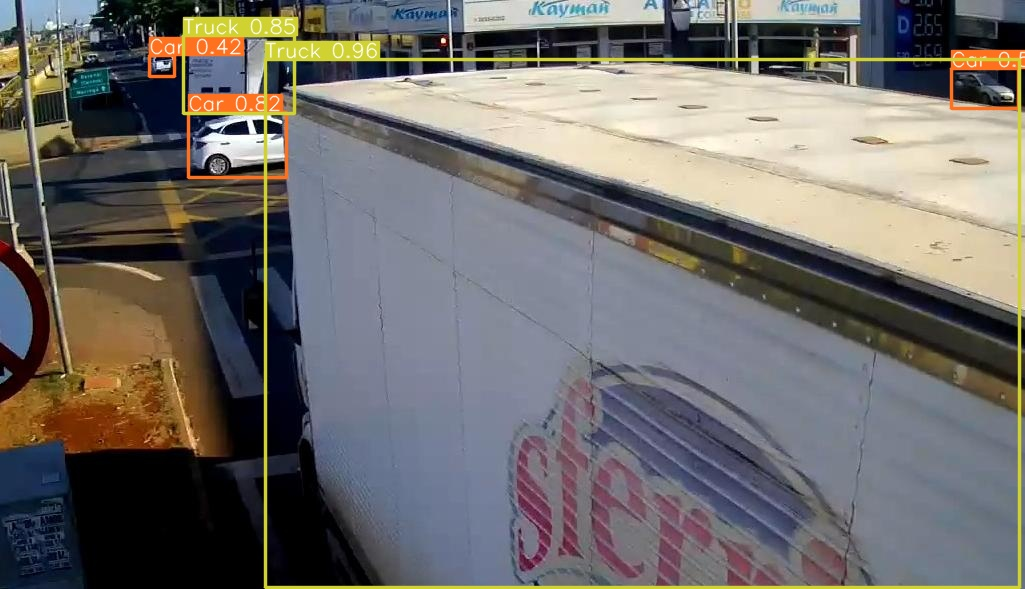

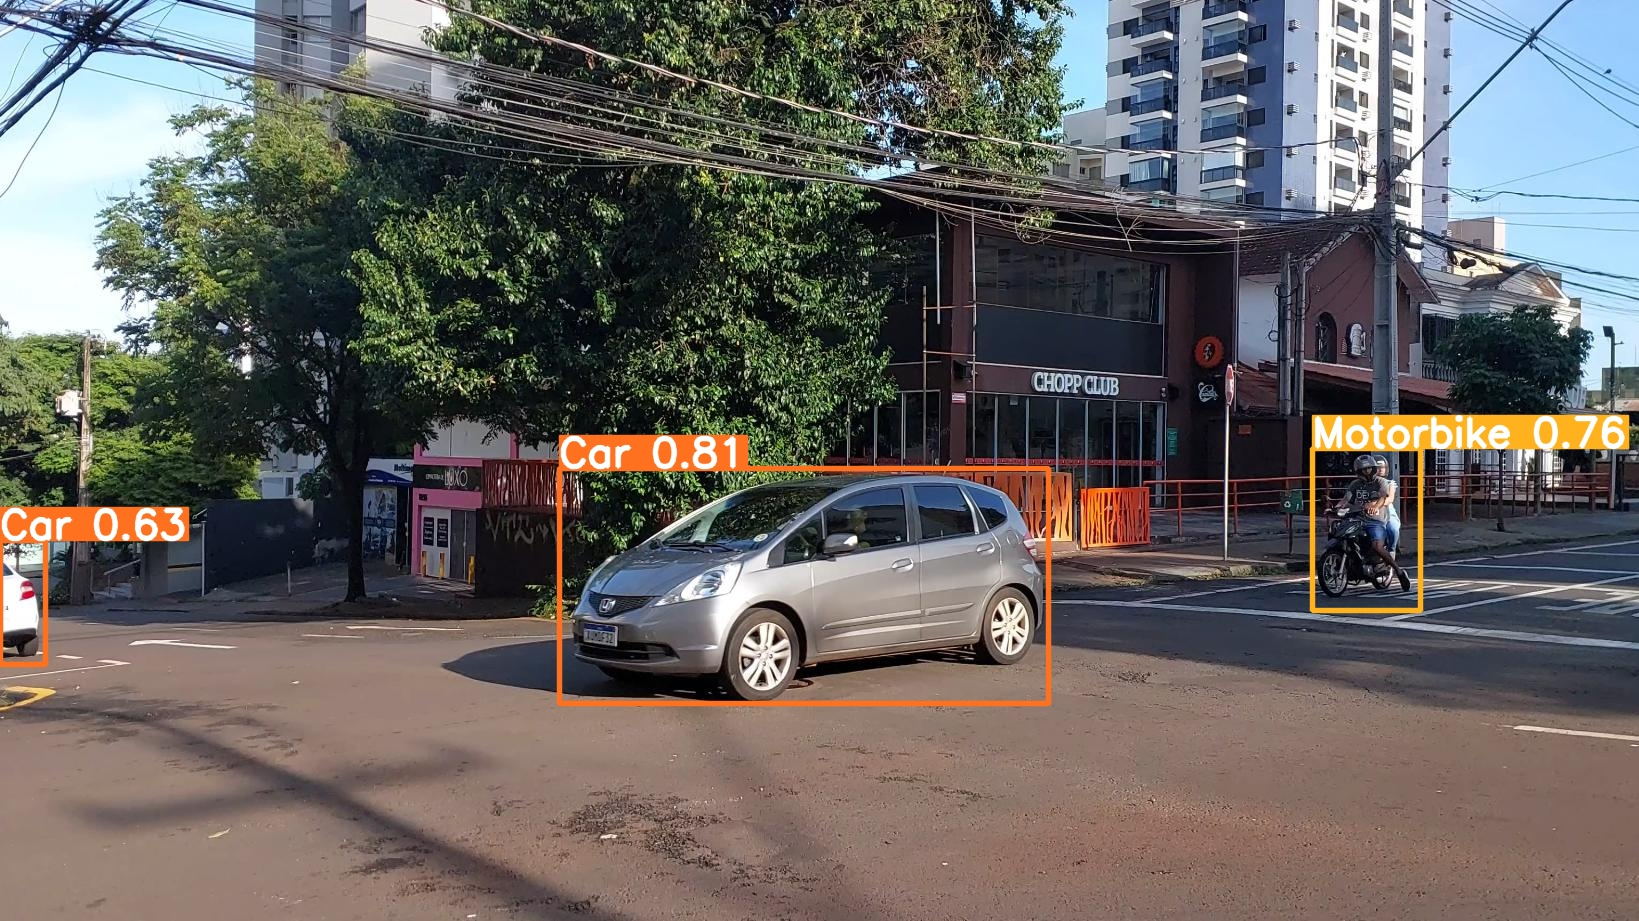

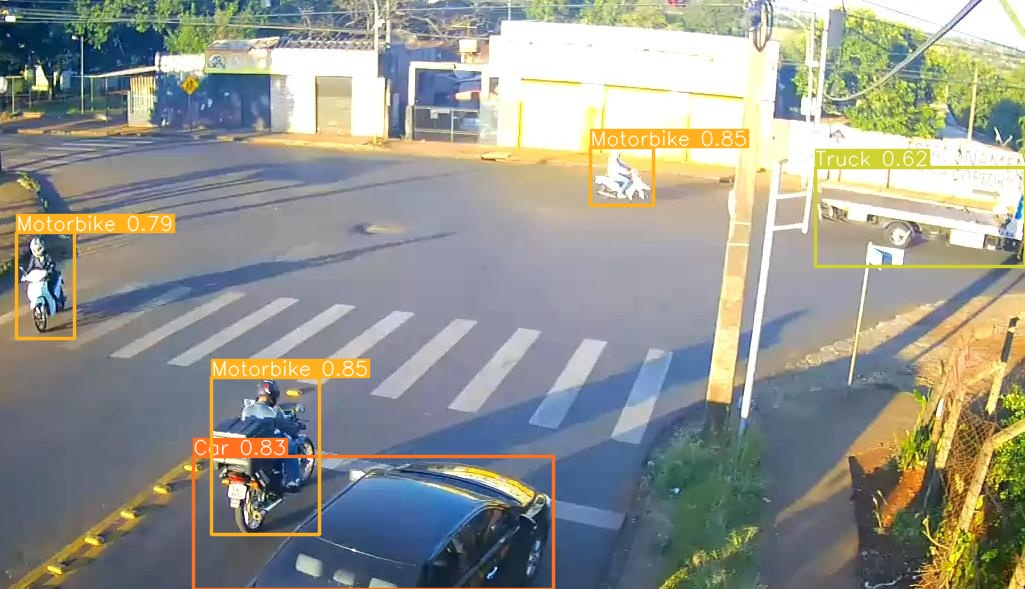

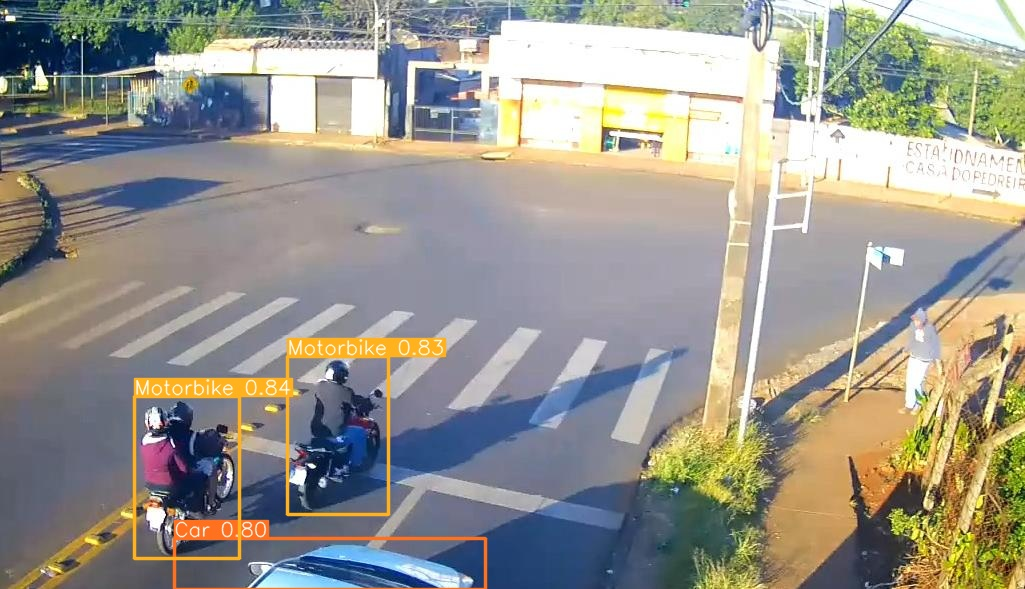

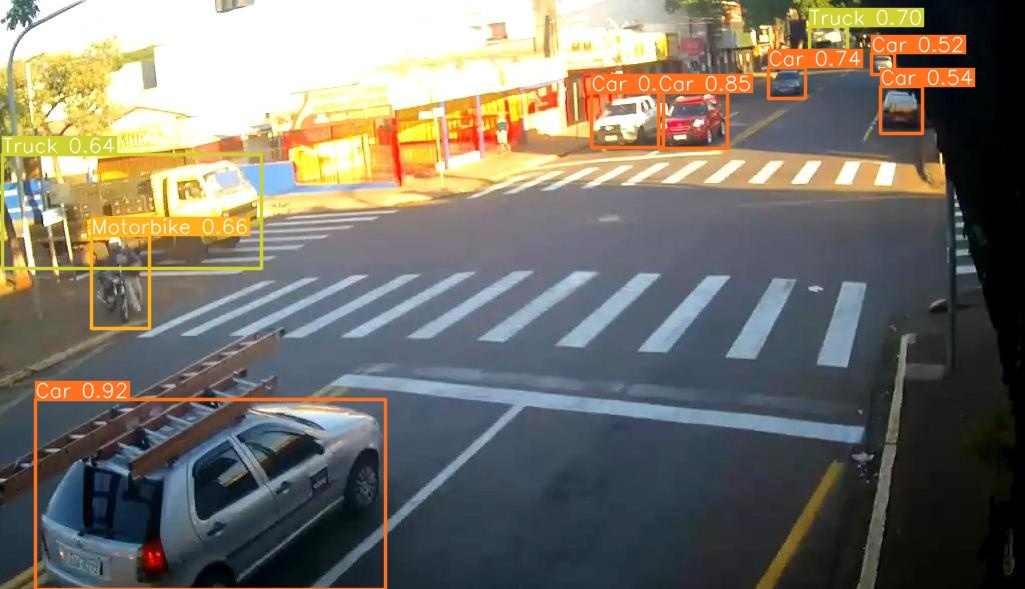

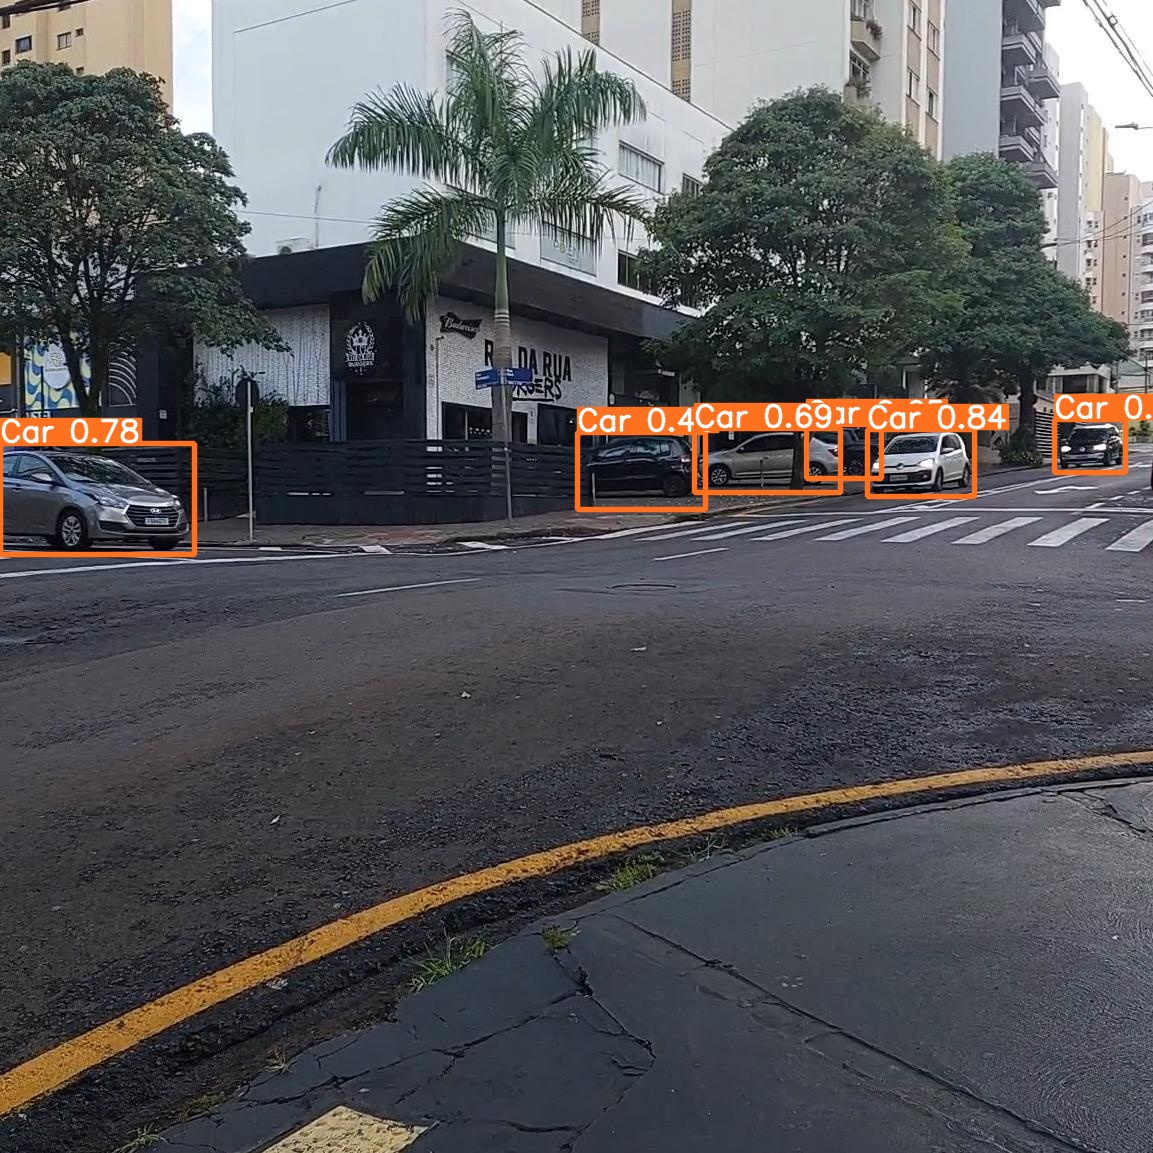

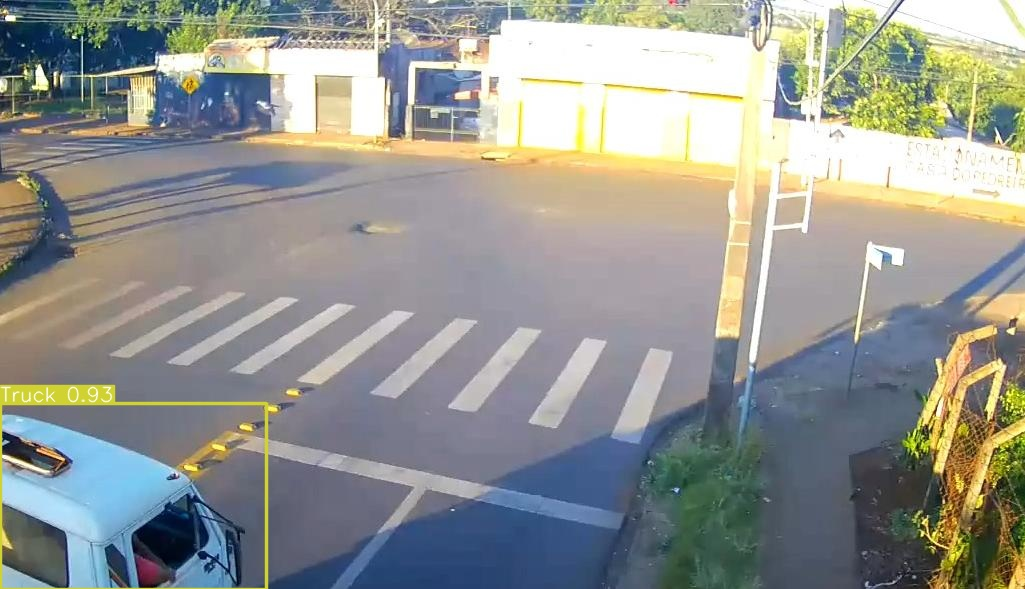

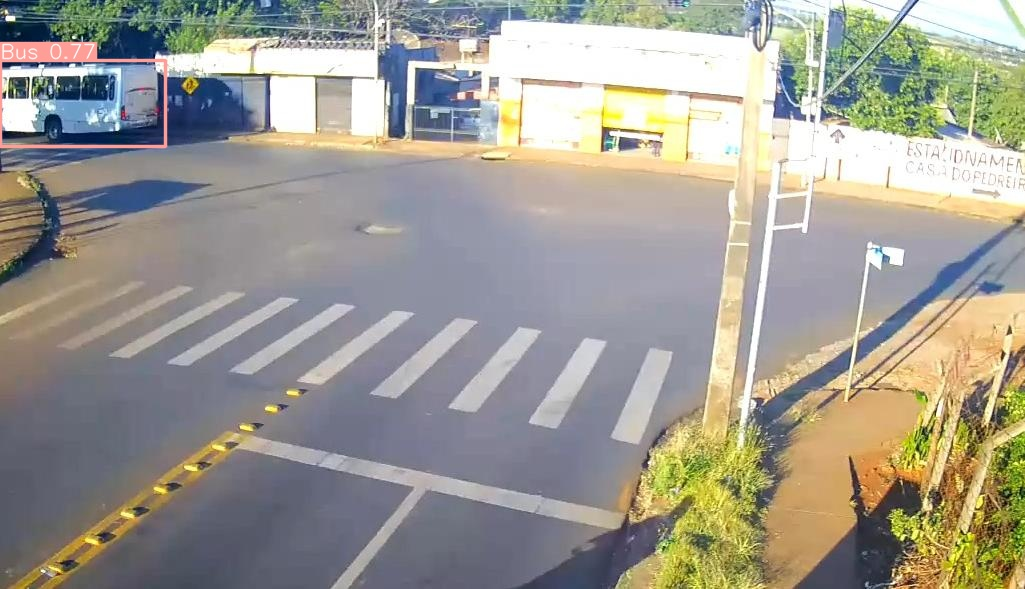

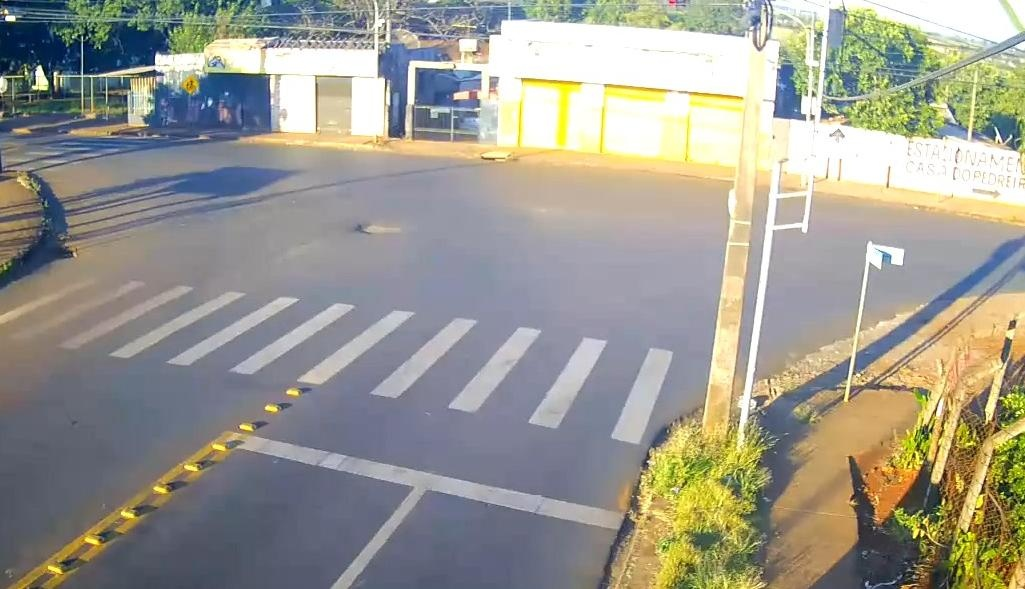

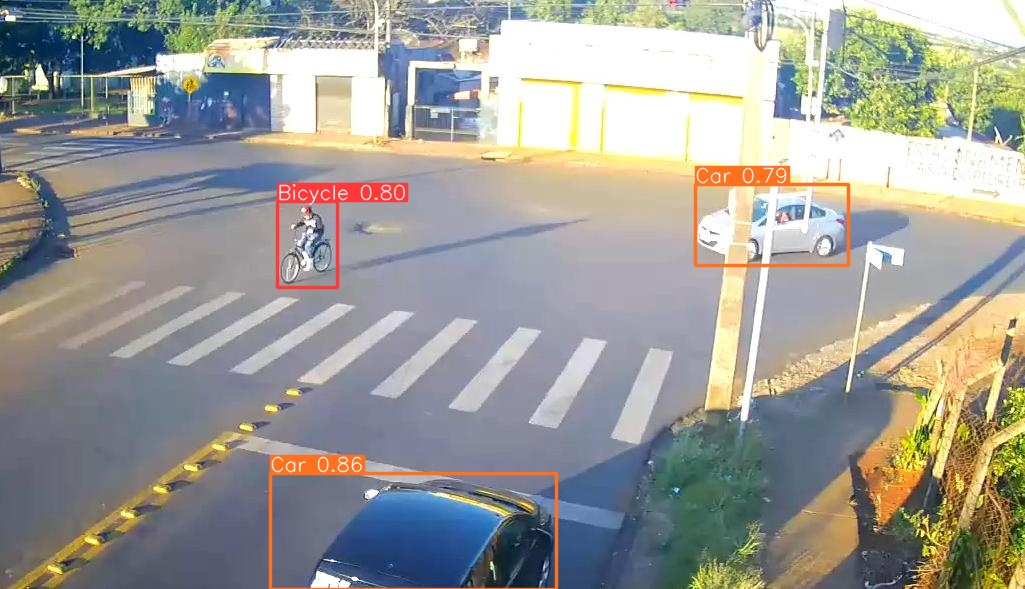

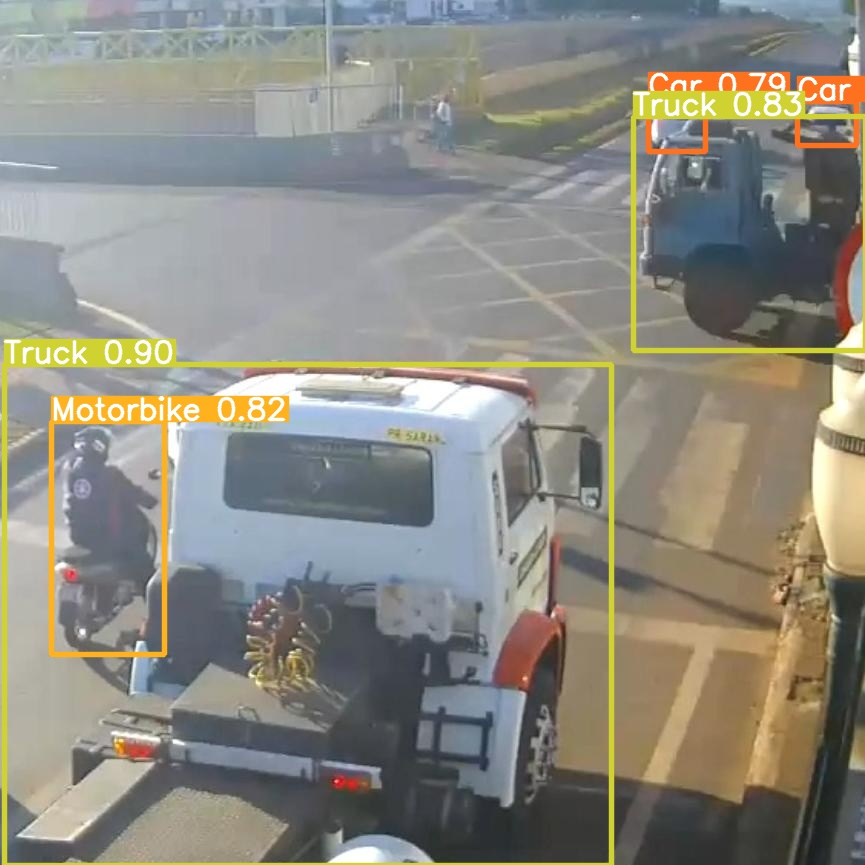

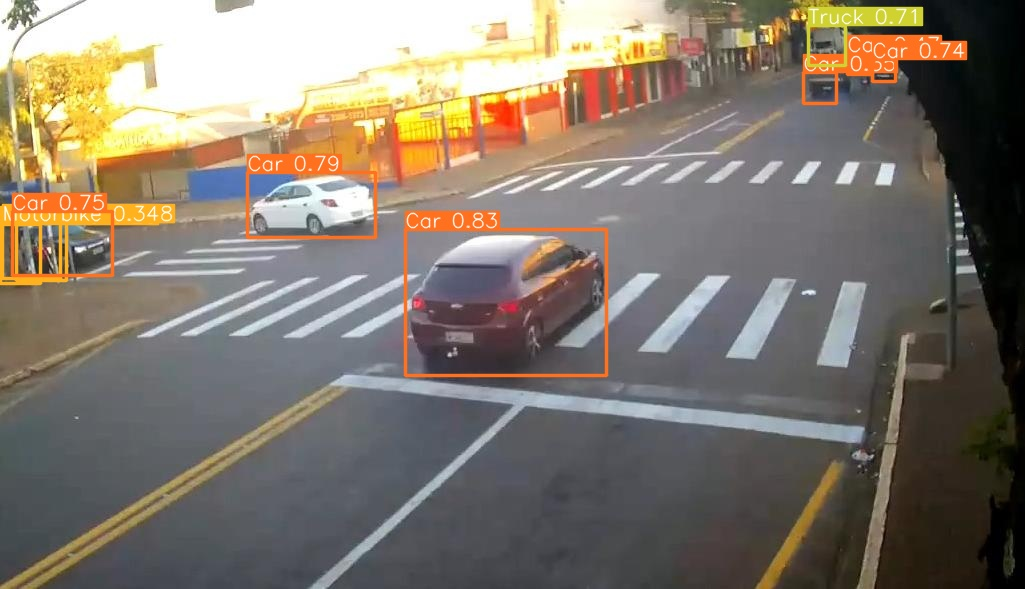

In [14]:
import glob
from IPython.display import Image, display

count = 25
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")
    count -= 1
    if count == 0:
        break

In [ ]:
# !rm -r runs
# !rm -r Traffic-Count-9
# !rm yolov8m.pt
# !rm yolov8n.pt